<a href="https://colab.research.google.com/github/coutinhoware/data-science/blob/main/ALURA/Redes%20Neurais%20Convolucionais%20-%20Deep%20Learning%20com%20PyTorch/5_6_BatchNorm_no_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALURA/Redes Neurais Convolucionais - Deep Learning com PyTorch/

In [8]:
import torch
from torch import nn

from skimage import data
import matplotlib.pyplot as plt

In [3]:
# Camada convolucional

conv = nn.Conv2d(in_channels=3, out_channels=16,
                 kernel_size=3, padding=1)

rgb = data.astronaut()
rgb_tns = torch.Tensor(rgb)
rgb_tns = rgb_tns.permute(2, 0, 1).unsqueeze(0)
mapa_de_ativacao = conv(rgb_tns)
print('Feature Map:', mapa_de_ativacao.shape)

Feature Map: torch.Size([1, 16, 512, 512])


In [4]:
# Camada de subamostragem (pooling)

pool = nn.MaxPool2d(kernel_size=2)
saida = pool(mapa_de_ativacao)
print(saida.size())

torch.Size([1, 16, 256, 256])


In [53]:
blococonv = nn.Sequential(
              nn.Conv2d(3, 32, kernel_size=3, padding=1),
              nn.BatchNorm2d(32),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=10)
            )

print(blococonv)

print(rgb_tns.size())
saida = blococonv(rgb_tns)
print(saida.size())

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=10, stride=10, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([1, 3, 512, 512])
torch.Size([1, 32, 51, 51])


---
### Exercício 5.7
Explore a documentação e substitua o *pooling* utilizado no script acima por outras funções 2D, como o `AvgPool2d` ou o `AdaptiveMaxPool2d`. Note que esse último não leva como parâmetro o tamanho do *kernel*, mas sim o tamanho da saída desejada.

A alteração deve ser feita na célula que define o *Pooling* na variável `pool`:

`pool = nn.MaxPool2d(kernel_size=2, stride=1)`

---

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AvgPool2d(kernel_size=2, stride=1, padding=0)
torch.Size([1, 3, 511, 511])


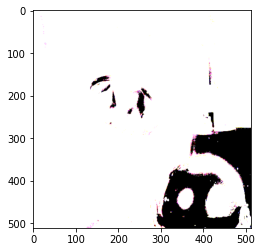

In [63]:
# pool2 = nn.MaxPool2d(kernel_size=2, stride=1)
pool2 = nn.AvgPool2d(kernel_size=2, stride=1)

print(pool2)
saida2 = pool2(rgb_tns)
print(saida2.size())  

plt.imshow(saida2.squeeze(0).permute(1, 2, 0).detach().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AdaptiveAvgPool2d(output_size=(7, 7))
torch.Size([1, 3, 7, 7])


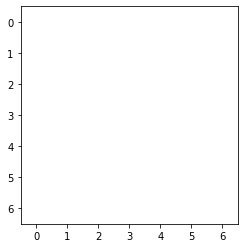

In [67]:
pool3 = nn.AdaptiveAvgPool2d(output_size=(7, 7)) # grande perda de informação se o tamanho da entrada foi muito maior que o tamanho da saída

print(pool3)
saida3 = pool3(rgb_tns)
print(saida3.size())

plt.imshow(saida3.squeeze(0).permute(1, 2, 0).detach().numpy())